In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline

In [2]:
#First step: Cleaning up US census data

In [3]:
pop = pd.read_csv('statepop.csv', header=1)

In [4]:
pop['Estimates Base'] = pop['Estimates Base'].str.strip('.')

In [5]:
indices = [0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 51,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,]

In [6]:
pop.iloc[8,0] = 'Washington DC'

In [7]:
pop = pop.reindex(indices)

In [8]:
pop.set_index('Estimates Base', inplace=True)

In [9]:
pop.sort_index(inplace=True)

In [10]:
pop.drop(columns=['2016', '2017', '2018', '2019'], inplace=True)

In [11]:
pop.shape

(52, 16)

In [12]:
pop = pop.T

In [13]:
pop = pop.values.flatten()

In [14]:
len(pop)

832

In [15]:
#Second step: drop a few years from my data where there was not reliable census data,
#and drop some rows where there was not reliable census data (Guam, Paula) as well as a
#Multi state row, which cannot be normalized without underlying data that is not accessible

In [83]:
df = pd.read_csv('outbreaks.csv')

In [100]:
df[df['State'] == 'Maine']

,Year,State,Illnesses
115,2000,Maine,55
163,2001,Maine,214
213,2002,Maine,126
263,2003,Maine,82
312,2004,Maine,44
359,2005,Maine,278
409,2006,Maine,388
459,2007,Maine,2590
509,2008,Maine,730
558,2009,Maine,50


In [84]:
df = df.groupby(['Year', 'State']).sum()['Illnesses']

In [85]:
df = df.reset_index()

In [86]:
df.drop(df[df['State'] == 'Guam'].index, inplace=True)

In [87]:
df.drop(df[df['State'] == 'Republic of Palau'].index, inplace=True)

In [88]:
df.drop(df[df['State'] == 'Multistate'].index, inplace=True)

In [89]:
df.drop(df[df['Year'] == 1998].index, inplace=True)

In [90]:
df.drop(df[df['Year'] == 1999].index, inplace=True)

In [91]:
df[df['State'] == 'Maine']

,Year,State,Illnesses
115,2000,Maine,55
163,2001,Maine,214
213,2002,Maine,126
263,2003,Maine,82
312,2004,Maine,44
359,2005,Maine,278
409,2006,Maine,388
459,2007,Maine,2590
509,2008,Maine,730
558,2009,Maine,50


In [24]:
#Third step, make a skeleton dataframe on which to concat my data, so that I can then 
#iterate over segments of data that will have uniform lenghths

In [25]:
states = sorted(df['State'].unique())

In [26]:
len(states)

52

In [27]:
year_list = []
year = 2000
for j in range(2000,2016):
    for i in range(len(states)):
        year_list.append(year)
    year +=1

In [28]:
state_list = []
for i in range(2000,2016):
    for state in states:
        state_list.append(state)

In [29]:
len(state_list)

832

In [30]:
len(year_list)

832

In [31]:
#Fifth step: left merge my data onto skeleton

In [32]:
left = pd.DataFrame(data=[year_list,state_list])

In [33]:
left.shape

(2, 832)

In [34]:
left = left.T

In [35]:
left.shape

(832, 2)

In [92]:
left

,Year,State
0,2000,Alabama
1,2000,Alaska
2,2000,Arizona
3,2000,Arkansas
4,2000,California
...,...,...
827,2015,Washington
828,2015,Washington DC
829,2015,West Virginia
830,2015,Wisconsin


In [36]:
left.rename(columns = {0:'Year', 1:'State'}, inplace=True)

In [37]:
df = left.merge(df, how='left', on=['Year', 'State'])

In [98]:
df[df['State'] == 'Maine']

,Year,State,Illnesses
115,2000,Maine,55
163,2001,Maine,214
213,2002,Maine,126
263,2003,Maine,82
312,2004,Maine,44
359,2005,Maine,278
409,2006,Maine,388
459,2007,Maine,2590
509,2008,Maine,730
558,2009,Maine,50


In [38]:
#Sixth: add population data and normalize

In [39]:
df['Population'] = pd.DataFrame(pop)

In [40]:
df['Illnesses / Population'] = df['Illnesses'] / df['Population']

In [41]:
df = df.fillna(0)

In [42]:
#Finally, graphs

In [43]:
y_list = []
for state in states:
    y_list.append(df[df['State'] == state]['Illnesses / Population'])

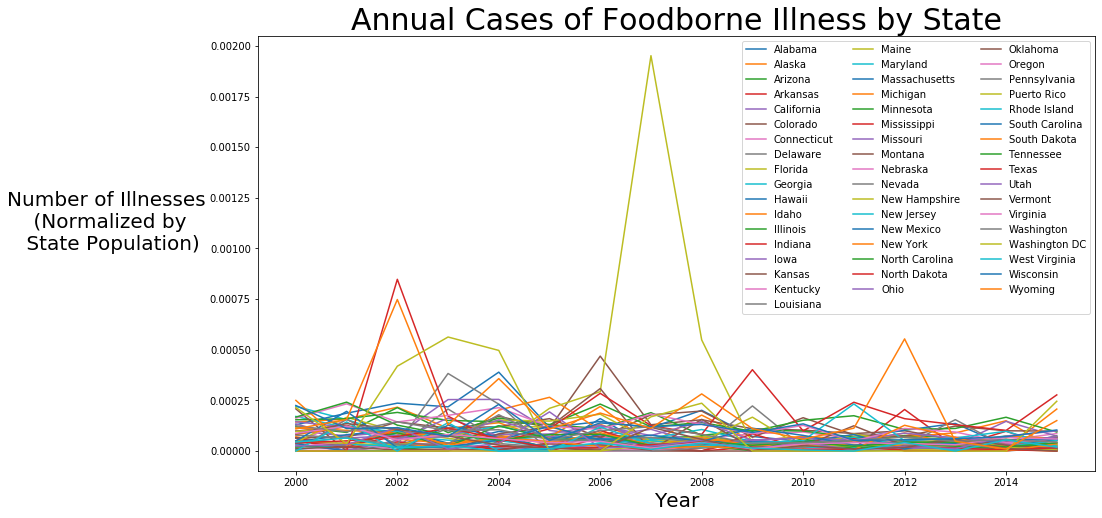

In [71]:
fig,ax=plt.subplots(figsize=(15,8))
for i in range(len(states)):
    ax.plot(range(2000,2016), y_list[i])
ax.set_xlabel('Year', size=20)
ax.set_ylabel('Number of Illnesses \n (Normalized by \n State Population)', size=20, rotation=0, labelpad=100)
ax.set_title('Annual Cases of Foodborne Illness by State', size=30)
plt.tight_layout
plt.legend(states, ncol=3);

In [80]:
df[df['Illnesses / Population'] > 0.0004].sort_values(by = 'Illnesses / Population', ascending=False)

,Year,State,Illnesses,Population,Illnesses / Population
382,2007,Maine,2590.0,1327040,0.001952
137,2002,North Dakota,541.0,638168,0.000848
155,2002,Wyoming,374.0,500017,0.000748
204,2003,Washington DC,320.0,568502,0.000563
675,2012,Wyoming,319.0,576305,0.000554
434,2008,Maine,730.0,1330509,0.000549
256,2004,Washington DC,282.0,567754,0.000497
317,2006,Colorado,2212.0,4720423,0.000469
152,2002,Washington DC,240.0,573158,0.000419
501,2009,North Dakota,267.0,664968,0.000402
